# Algorithmes de descente en optimisation différentiable sans contrainte

Mettez ci-dessous les imports classiques de librairie Python

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import math

Dans ce TP, nous nous intéressons aux algorithmes pour la minimisation sans contrainte de fonctionnelles très générales: le problème s'écrit:

$$\min_{x\in\mathbb{R}^n} f(x).$$

Le but de cette séance est l'écriture d'un code de minimisation locale, et l'évaluation de ses performances sur les fonctions tests suivantes:

<li>$f_1(x,y) = 2(x+y-2)^2+(x-y)^2$.
<li>$f_2(x,y) = 100(y-x^2)^2 + (1-x)^2$ (fonction de Rosenbrock).

On appelle $\textit{oracle}$ une routine qui à un $x$ donné, renvoie la valeur $f(x)$ du critère, le gradient $\nabla f(x)$ (ou une approximation du gradient) s'il existe, et éventuellement la matrice Hessienne $H[f](x)$ (ou une approximation) si elle existe et si nécessaire:

$$[f(x),\nabla f(x),H[f](x)] = \textrm{oracle}(x)$$

> **A faire :** Calculer les gradients et les Hessiennes des deux fonctions proposées et implémenter les fonctions $\textrm{oracle}$ correspondantes.

>**Réponse :** *On trouve les gradients
$$\nabla f_1(x) = \begin{pmatrix}6x+2y-8\\6y+2x-8\end{pmatrix} \quad\mbox{ et }\quad \nabla f_2(x) = \begin{pmatrix}400(x^3-yx)+2(x-1)\\200(y-x^2)\end{pmatrix}.$$
Ainsi que les hessiennes
$$H[f_1](x) = \begin{pmatrix}6&2\\2&6\end{pmatrix} \quad\mbox{ et }\quad H[f_2](x) = \begin{pmatrix}1200x^2 - 400y + 2 & -400x\\-400x&200\end{pmatrix} .$$* 

In [11]:
def oracle1(x):
    f = 2*(x[0]+x[1]-2)**2+(x[0]-x[1])**2
    df = np.zeros(2)
    df[0] = 6*x[0]+2*x[1]-8
    df[1] = 6*x[1]+2*x[0]-8
    Hf = np.zeros((2,2))
    Hf[0][0] = 6
    Hf[0][1] = 2
    Hf[1][0] = 2
    Hf[1][1] = 6
    return f,df,Hf

def oracle2(x):
    f = 100*(x[1]-x[0]**2)**2+(1-x[0])**2
    df = np.zeros(2)
    df[0] = 400*(x[0]**3-x[1]*x[0])+2*(x[0]-1)
    df[1] = 200*(x[1]-x[0]**2)
    Hf = np.zeros((2,2))
    Hf[0][0] = 1200*x[0]**2-400*x[1]+2
    Hf[0][1] = -400*x[0]
    Hf[1][0] = -400*x[0]
    Hf[1][1] = 200
    return f,df,Hf

On rappelle qu'un algorithme de descente appliqué à la minimisation de $f$ possède la forme suivante:

* **Données :** $x_0\in \mathbb{R}^n$ point initial arbitraire, un oracle.
* **Initialisation :** Numéro d'itération: $k=0$.
* **Tant que** le critère d'arrêt n'est pas satisfait, **faire**
  * Calcul de la direction de descente $d_k$.
  * Choix/Calcul du pas $s_k$.
  * Mise à jour: calcul du prochain itéré $x_{k+1}$.
  * $k = k + 1.$

> **A faire :** Résolution mathématique:

1. Donner les points critiques des fonctions proposées.
2. Les fonctions $f_i$ admettent-elles des extrema sur $\mathbb{R}^2$?

>**Réponse :** *Les points critiques $x^*_i\in\mathbb{R}^2$, $i\in\{1,2\},$ des fonctions $f_i$ vérifie
$$\nabla f_1(x^\star_1) = 0 \quad \Leftrightarrow \quad x^\star_1 = \begin{pmatrix} 1\\1 \end{pmatrix},$$
et
$$\nabla f_2(x^\star_2) = 0 \quad \Leftrightarrow \quad x^\star_2 = \begin{pmatrix} 1\\1 \end{pmatrix}.$$
On remarque que
$$\det(H[f_1](x^\star_1)) = \det\begin{pmatrix}6&2\\2&6\end{pmatrix}=32>0 \quad\mbox{ et }\quad \textrm{Tr}(H[f_1](x^\star_1)) = 12>0,$$
donc $x^\star_1$ est un minimum localde la fonction $f_1$.
De même, sachant que
$$\det(H[f_2](x^\star_2)) = \begin{pmatrix}802 & -400\\-400&200\end{pmatrix} = 400\quad\mbox{ et }\quad \textrm{Tr}(H[f_2](x^\star_2)) >0,$$
on déduit que $x^\star_2$ est un minimum local.
Les minimums sont même globaux car les fonctions $f_i$ sont $\ge 0$ et sont nulles en $x_i^\star$*

> **A faire :** Implémenter deux algorithmes de mimimisation, un par méthode de gradient à pas fixe et l'autre par une méthode de Newton locale. Les arguments d'entrée sont $\textrm{function}$ qui est l'oracle à minimiser, $\textrm{xini}$ qui est le point initial et $\textrm{h}$ qui est le pas de la méthode de gradient. Les arguments de sortie sont $\textrm{x}$ la valeur finale du point trouvée, $\textrm{xiter}$ qui est la valeur du point au cours des itérations et $\textrm{iter}$ le nombre d'itérations pour arriver à convergence.

In [43]:
def Gradient(function,h=1e-1,xini=np.array([0,0])):
    x = np.copy(xini)
    y=[x]
    eps = 1e-10
    itermax = 1000
    err = 2*eps
    iter = 0
    while err>eps and iter<itermax:
        f,df,Hf = function(x)
        x = x - h*df
        y.append(x)
        err = np.linalg.norm(df)
        iter += 1
    xiter=np.array(y)
    return x,xiter,iter

In [44]:
def Newton(function,xini=[0,0]):
    x = np.copy(xini)
    y=[x]
    eps = 1e-10
    itermax = 1000
    err = 2*eps
    iter = 0
    while err>eps and iter<itermax:      
        f,df,Hf = function(x)     
        x = x - np.linalg.solve(Hf,df)
        y.append(x)
        err = np.linalg.norm(df)
        iter += 1
    xiter=np.array(y)
    return x,xiter,iter

> **A faire :** En utilisant le module $\textrm{matplotlib.pyplot}$, on veut représenter/dessiner la suite des itérés dans $\mathbb{R}^2$ avec la fonction $\textrm{scatter}$.On souhaite aussi représenter les fonctions $f_1$ et $f_2$ en utilisant la fonction $\textrm{contour}$ du module $\textrm{matplotlib.pyplot}$. On s'inspirera du code qui suit pour créer deux fonctions (une pour chaque oracle) $\textrm{affichage1(xiter)}$ et $\textrm{affichage2(xiter)}$ qui affiche représente les itérations.

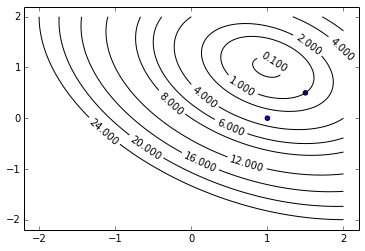

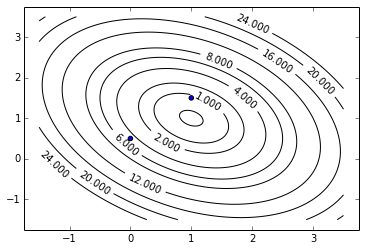

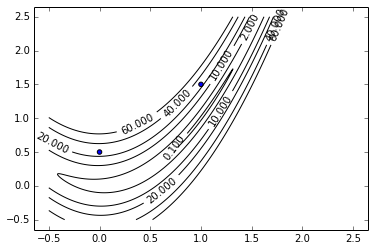

In [83]:
Nx = 1000
Ny = 1000
x = np.linspace(-2,2,Nx)
y = np.linspace(-2,2,Ny)
X, Y = np.meshgrid(x, y)
Z = 2*(X+Y-2)**2+(X-Y)**2
CS=plt.contour(X, Y, Z,[0,0.1,1,2,4,6,8,12,16,20,24],colors='k')
plt.clabel(CS, inline=1, fontsize=10)
z = [[1,1.5],[0,0.5]]
plt.scatter(z[0],z[1],marker='o')
plt.show()
def affichage1(xiter) :
    Nx = 1000
    Ny = 1000
    x = np.linspace(-1.5,3.5,Nx)
    y = np.linspace(-1.5,3.5,Ny)
    X, Y = np.meshgrid(x, y)
    Z=2*(X+Y-2)**2+(X-Y)**2 
    CS=plt.contour(X, Y, Z,[0,0.1,1,2,4,6,8,12,16,20,24],colors='k')
    plt.scatter(xiter[:,0], xiter[:,1],marker='o')
    plt.clabel(CS, inline=1, fontsize=10)
def affichage2(xiter) :
    Nx = 1000
    Ny = 1000
    x = np.linspace(-0.5,2.5,Nx)
    y = np.linspace(-0.5,2.5,Ny)
    X, Y = np.meshgrid(x, y)
    Z=100*(Y-X**2)**2+(1-X)**2
    CS=plt.contour(X, Y, Z,[0,0.1,2,10,20,40,60],colors='k')
    plt.scatter(xiter[:,0], xiter[:,1],marker='o')
    plt.clabel(CS, inline=1, fontsize=10)
affichage1(np.array(z))
plt.show()
affichage2(np.array(z))
plt.show()

Tester la méthode de Newton et la méthode de gradient pour différents points de départ et différents pas pour la fonction oracle1. Conclure

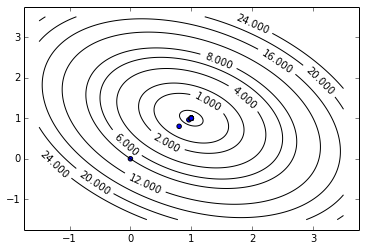

a : convergence vers  [ 1.  1.]  nb iterations :  17


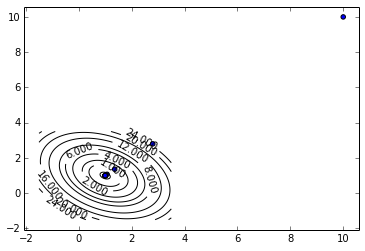

b: convergence vers  [ 1.  1.]  nb iterations :  19


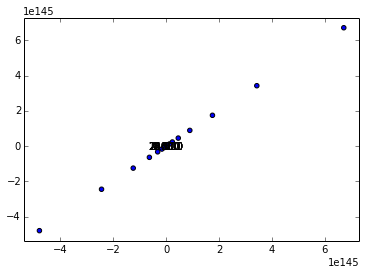

c: convergence vers  [  6.71437638e+145   6.71437638e+145]  nb iterations :  1000


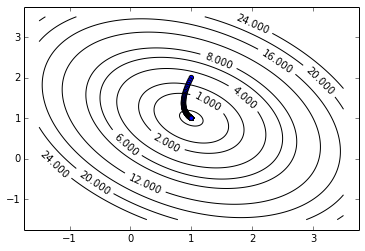

d: convergence vers  [ 1.  1.]  nb iterations :  591


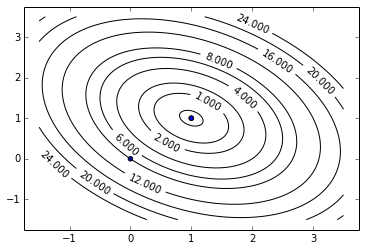

e: convergence vers  [ 1.  1.]  nb iterations :  2


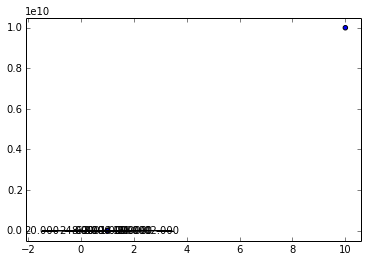

f: convergence vers  [ 1.  1.]  nb iterations :  2


In [78]:
# convergence usuelle
x,xiter,t=Gradient(oracle1)
affichage1(xiter)
plt.show()
print "a : convergence vers ",x," nb iterations : ",t

# On s'éloigne et on converge
x,xiter,t=Gradient(oracle1,xini=[10,10])
affichage1(xiter)
plt.show()
print "b: convergence vers ",x," nb iterations : ",t

# On prend un pas trop grand, on ne converge plus
x,xiter,t=Gradient(oracle1,xini=[1,2],h=0.3)
affichage1(xiter)
plt.show()
print "c: convergence vers ",x," nb iterations : ",t

# On prend un pas trop petit, c'est lent
x,xiter,t=Gradient(oracle1,xini=[1,2],h=1e-2)
affichage1(xiter)
plt.show()
print "d: convergence vers ",x," nb iterations : ",t

# convergence immediate
x,xiter,t=Newton(oracle1)
affichage1(xiter)
plt.show()
print "e: convergence vers ",x," nb iterations : ",t

# convergence immediate
x,xiter,t=Newton(oracle1,xini=[10,1e10])
affichage1(xiter)
plt.show()
print "f: convergence vers ",x," nb iterations : ",t



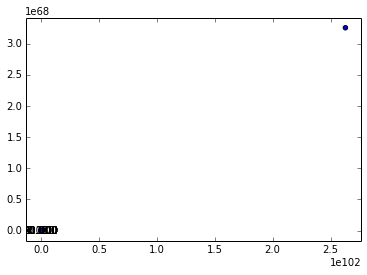

a : convergence vers  [ nan  inf]  nb iterations :  9


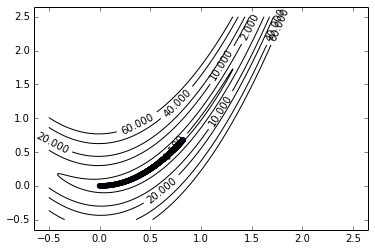

b : convergence vers  [ 0.82231848  0.67541827]  nb iterations :  1000


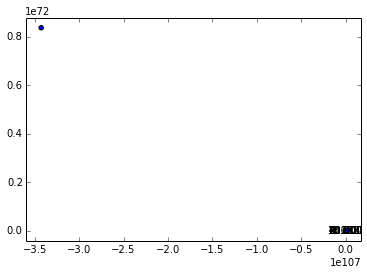

c : convergence vers  [ nan  inf]  nb iterations :  7


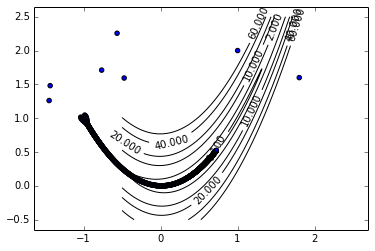

d : convergence vers  [ 0.72350239  0.52216087]  nb iterations :  1000


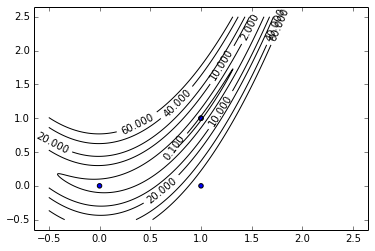

e : convergence vers  [ 1.  1.]  nb iterations :  3


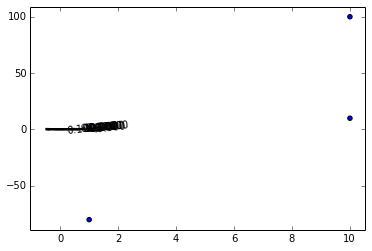

f : convergence vers  [ 1.  1.]  nb iterations :  6


In [84]:
#Test1 : non convergence
x,xiter,t=Gradient(oracle2)
affichage2(xiter)
plt.show()
print "a : convergence vers ",x," nb iterations : ",t

#Test2 : pour faire converger le test1, on prend des pas minuscules
x,xiter,t=Gradient(oracle2,h=2e-3)
affichage2(xiter)
plt.show()
print "b : convergence vers ",x," nb iterations : ",t

#Test3 : pour faire converger le test1, on se rapproche du min
# Cela ne fonctionne toujours pas, le pas est trop gros
x,xiter,t=Gradient(oracle2,xini=[1.1,1.1])
affichage2(xiter)
plt.show()
print "c : convergence vers ",x," nb iterations : ",t

# Autre cas marrant du gradient
x,xiter,t=Gradient(oracle2,xini=[1,2],h=2e-3)
affichage2(xiter)
plt.show()
print "d : convergence vers ",x," nb iterations : ",t

#Test4 : convergence pour Newton
x,xiter,t=Newton(oracle2,xini)
affichage2(xiter)
plt.show()
print "e : convergence vers ",x," nb iterations : ",t

#Test1 : Newton, on s'éloigne un peu du min, cela fonctionne
x,xiter,t=Newton(oracle2,xini=[10,10])
affichage2(xiter)
plt.show()
print "f : convergence vers ",x," nb iterations : ",t

